In [1]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv"

In [2]:
!wget $data

--2024-10-01 15:02:21--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv’

laptops.csv         100%[===================>] 291.58K   371KB/s    in 0.8s    

2024-10-01 15:02:23 (371 KB/s) - ‘laptops.csv’ saved [298573/298573]



In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv("laptops.csv")
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [17]:
df.dtypes

Laptop           object
Status           object
Brand            object
Model            object
CPU              object
RAM               int64
Storage           int64
Storage type     object
GPU              object
Screen          float64
Touch            object
Final Price     float64
dtype: object

In [61]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [62]:
columns = ['ram','storage','screen','final_price']



In [63]:
df_trun  = df[columns]
df_trun

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


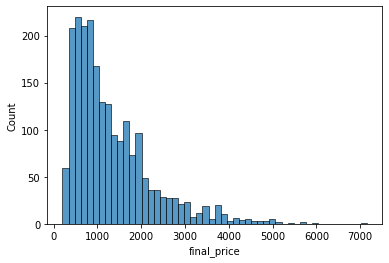

In [64]:
sns.histplot(df.final_price, bins = 50);

In [65]:
# missing values
df_trun.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [66]:
df_trun.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [67]:
# split dataset 
n = len(df_trun)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [68]:
#subset dataset

#shuffle the dataset
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df_trun.iloc[idx[:n_train]]
df_val = df_trun.iloc[idx[n_train:n_train + n_val]]
df_test = df_trun.iloc[idx[n_val + n_train:]]

In [69]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_val = df_test.reset_index(drop=True)

In [70]:
# collect our target variable

y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [71]:
del df_train['final_price']
del df_test['final_price']
del df_val['final_price']

In [72]:
def prepare_x_fill_zeros(df):
    df = df.copy()
    

    df = df.fillna(0)
    
    X = df.values

    return X

In [73]:
def prepare_x_fill_mean(df):
    df = df.copy()
    
    mean = df['screen'].mean()
    df = df.fillna(value=mean)
    
    X = df.values

    return X

#### Linear Regression

In [50]:
def dot(xi, w):
    n = len(xi)

    res = 0.0 

    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [51]:
def train_linear_regression(X,y):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X]).round()

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0],w_full[1:]

In [52]:
# function to calculate the root mean squared error
def rmse(y,y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [83]:
# using the fillna with 0
X_train = prepare_x_fill_zeros(df_train)

w0,w = train_linear_regression(X_train,y_train)
# y_pred = w0 + X_train.dot(w)

X_val = df_val.values
y_pred = w0 + X_val.dot(w)

score = rmse(y_val,y_pred)
round(score,2)

0.42

In [82]:
# using the fillna with mean
X_train = prepare_x_fill_mean(df_train)

w0,w = train_linear_regression(X_train,y_train)
# y_pred = w0 + X_train.dot(w)

X_val = df_val.values
y_pred = w0 + X_val.dot(w)

score = rmse(y_val,y_pred)
round(score,2)

0.42